# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: Pamela Ofurum

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [15]:
import numpy as np
import pandas as pd

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [16]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam

# Here it loads the spam dataset using Yellowbrick
X, y = load_spam()

# Here it Prints the size (shape) and data type of X
print("X shape:", X.shape)
# print("X data type:", X.dtypes)
# Print the data type of the entire X feature matrix
print("X data type:", type(X))

# Here it prints the size (shape) and data type of y
print("y shape:", y.shape)
# print("y data type:", y.dtype)
# Print the data type of the entire Y feature matrix
print("Y data type:", type(y))

X.head()


X shape: (4600, 57)
X data type: <class 'pandas.core.frame.DataFrame'>
y shape: (4600,)
Y data type: <class 'pandas.core.series.Series'>


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [17]:
# TO DO: Check if there are any missing values and fill them in if necessary

# Here it Checks for missing values in X
missing_values = X.isnull().sum().sum()

if missing_values == 0:
    print("There are no missing values in the dataset.")
else:
    print(f"There are {missing_values} missing values in the dataset.")
    # If necessary, fill in missing values using an appropriate method
    # For instance, you can fill missing values with the mean of each column:
    X.fillna(X.mean(), inplace=True)
    print("Missing values have been filled.")

There are no missing values in the dataset.


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [18]:
# TO DO: Create X_small and y_small 

from sklearn.model_selection import train_test_split

# Here it loads the spam dataset using Yellowbrick
X, y = load_spam()

# Here it splits the dataset into training and testing subsets (5% of the data)
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.95, random_state=42)

# Here it prints the size (shape) of X_small and y_small
print("X_small shape:", X_small.shape)
print("y_small shape:", y_small.shape)


X_small shape: (230, 57)
y_small shape: (230,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

Training and validating on the X and y...

Training and validating Only first two columns of X and y...

Training and validating on X_small and y_small...
Results:
                      Data size  Training Accuracy  Validation Accuracy
0                       X and y           0.934239             0.912391
1  First Two Columns of X and y           0.620109             0.609783
2           X_small and y_small           0.961957             0.882609


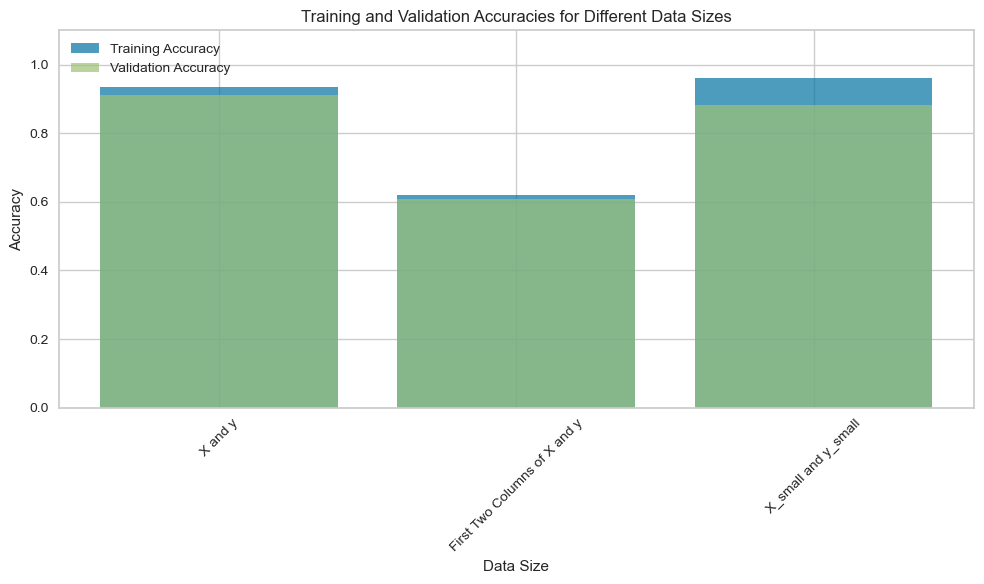

In [19]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from yellowbrick.datasets import load_spam
import numpy as np

# Here it creates an empty list to store the results as dictionaries
results_data = []

# Here it loads the spam dataset using Yellowbrick
X, y = load_spam()

# Here it creates an instance of LogisticRegression with max_iter=2000
model = LogisticRegression(max_iter=2000)

#1. Here it trains and validates the model on the original dataset (X and y)
print("Training and validating on the X and y...")
#  Here it Splits the data into training and validation subsets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#  Here it fits the model on the training data
model.fit(X_train, y_train)

#  Here it calculates training accuracy
training_accuracy = model.score(X_train, y_train)

#  Here it calculates validation accuracy using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
validation_accuracy = np.mean(cv_scores)

#  Here it adds the results as a dictionary to the list
results_data.append({'Data size': 'X and y', 'Training Accuracy': training_accuracy, 'Validation Accuracy': validation_accuracy})

#  Here it loads the spam dataset again to work with a fresh copy
X, y = load_spam()

#  Here it selects only the first two columns of X
X_first_two_columns = X.iloc[:, :2]

#2 Here it trains and validates the model on the dataset with only the first two columns (X_first_two_columns and y)
print("\nTraining and validating Only first two columns of X and y...")
#  Here it splits the data into training and validation subsets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_first_two_columns, y, test_size=0.2, random_state=42)

#  Here it fits the model on the training data
model.fit(X_train, y_train)

#  Here it calculates training accuracy
training_accuracy = model.score(X_train, y_train)

#  Here it calculates validation accuracy using cross-validation
cv_scores = cross_val_score(model, X_first_two_columns, y, cv=5)  # 5-fold cross-validation
validation_accuracy = np.mean(cv_scores)

#  Here it adds the results as a dictionary to the list
results_data.append({'Data size': 'First Two Columns of X and y', 'Training Accuracy': training_accuracy, 'Validation Accuracy': validation_accuracy})

#  Here it loads the spam dataset again to work with a fresh copy
X, y = load_spam()

#  Here it splits the data into training and testing subsets (5% of the data)
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.95, random_state=42)

# 3.  Here it trains and validates the model on the small dataset (X_small and y_small)
print("\nTraining and validating on X_small and y_small...")
#   Here it splits the data into training and validation subsets (80% training, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

#  Here it fits the model on the training data
model.fit(X_train, y_train)

#  Here it calculates training accuracy
training_accuracy = model.score(X_train, y_train)

#  Here it calculates validation accuracy using cross-validation
cv_scores = cross_val_score(model, X_small, y_small, cv=5)  # 5-fold cross-validation
validation_accuracy = np.mean(cv_scores)

#  Here it adds the results as a dictionary to the list
results_data.append({'Data size': 'X_small and y_small', 'Training Accuracy': training_accuracy, 'Validation Accuracy': validation_accuracy})

#  Here it creates a DataFrame directly from the list of dictionaries
results = pd.DataFrame(results_data)

#  Here it prints the results DataFrame
print("Results:")
print(results)

#  Here it visualizes Results 
import matplotlib.pyplot as plt

#   Here it plots the training and validation accuracies for different data sizes
plt.figure(figsize=(10, 6))
plt.bar(results['Data size'], results['Training Accuracy'], label='Training Accuracy', alpha=0.7)
plt.bar(results['Data size'], results['Validation Accuracy'], label='Validation Accuracy', alpha=0.7)
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Data Sizes')
plt.legend()
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.

Analyzing the training and validation accuracy change based on the amount of data used:

For x and y Dataset:

Training Accuracy: 0.934239 (93.42%)
Validation Accuracy: 0.912391 (91.24%)
In the above  case, I used the entire dataset "X and y." The model produced a relatively high training accuracy 93.42%, which indicates that it fits the data well. The validation accuracy is slightly lower than the training accuracy 91.24% but it's still reasonably high and it suggests that the model generalizes well to unseen data. Since the training and validation accuracies are close, this indicates a good model fit.

First Two Columns of X and y Dataset:

Training Accuracy: 0.620109 (62.01%)
Validation Accuracy: 0.609783 (60.98%)
When I used only the first two columns of "X and y," the model's performance significantly decreased. Both the training and validation accuracies became relatively low at 62.01% and 60.98% respectively and this suggests that the model was not able to capture the patterns in the reduced dataset as effectively as it did with the full dataset. The drop in accuracy indicates that the first two columns of "X and y might not contain sufficient information for accurate classification.

X_small and y_small Dataset:

Training Accuracy: 0.961957 (96.20%)
Validation Accuracy: 0.882609 (88.26%)
When I used the "x_small and y_small" dataset, which is only 5% of the x and y dataset, the training accuracy was extremely high 96.20% which indicates that the model fits the small dataset almost perfectly. However, the validation accuracy was lower than the training accuracy at 88.26% suggesting that the model might be overfitting the small dataset because it doesn't generalize as well to unseen data. The large gap between training and validation accuracies indicates overfitting.

2. In this case, what do a false positive and a false negative represent? Which one is worse?

In the above case, in respect to spam detection, "false positives" and "false negatives" have specific representation as described below:

False Positive (FP):

A false positive represents a model that predicts a positive (spam) class when the actual class is negative (not spam). In other words, the model incorrectly identifies a non-spam message as spam. So with respect to spam detection, a false positive means that a legitimate email (not spam) is classified as spam and might be placed in the spam folder or flagged as spam by email filtering software. This is detrimental to users because they may miss important emails if they are incorrectly  classified as spam.

False Negative (FN):

A false negative represents a model that predicts a negative (not spam) class when the actual class is positive (spam). In other words, the model fails to identify a spam message, and allows it to pass as a non-spam message. So with respect to spam detection, a false negative means that a spam email goes undetected and ends up in the user's inbox. This is detrimental to the users because it allows unwanted or potentially harmful content to reach the user's inbox and potentially exposes them to phishing attacks and other malicious content.

Which one is worse?

To determine which one is worse, I would say it depends on the specific application and its consequences:

False Positive can be considered as less severe in spam detection because while they may be inconvenient and may lead to missed emails, they are generally usually not harmful and can be manually corrected by users by simply moving legitimate emails from the spam folder to the inbox. Whereas False Negatives can typically be considered more serious because allowing spam emails to reach a user's inbox can have potentially harmful consequences, such as falling victim to phishing scams or being exposed to malware. This is greatly because email users rely on spam filters to protect them from these risks, so inorder words, failing to detect spam false negatives (spam) can result in more significant harm.


*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI 
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3,4 and 5
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing parts I need and also the remove the unnecessary parts which wasn't needed.
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially with the dataframe when I tried to visualize it. I figured out the error and debugged and after which I was able visualize my results which looked fantastic on the plots.

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [20]:
# TO DO: Import spam dataset from yellowbrick library
# TO DO: Print size and type of X and y
from yellowbrick.datasets import load_spam

#  Here it loads the spam dataset using Yellowbrick
X, y = load_spam()

#  Here it prints the size (shape) and data type of X
print("X shape:", X.shape)
# print("X data type:", X.dtypes)
# Print the data type of the entire X feature matrix
print("X data type:", type(X))

#  Here it prints the size (shape) and data type of y
print("y shape:", y.shape)
# print("y data type:", y.dtype)
# Print the data type of the entire Y feature matrix
print("Y data type:", type(y))

X.head()


X shape: (4600, 57)
X data type: <class 'pandas.core.frame.DataFrame'>
y shape: (4600,)
Y data type: <class 'pandas.core.series.Series'>


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [21]:
# TO DO: Check if there are any missing values and fill them in if necessary
# TO DO: Check if there are any missing values and fill them in if necessary

# Here it Checks for missing values in X
missing_values = X.isnull().sum().sum()

if missing_values == 0:
    print("There are no missing values in the dataset.")
else:
    print(f"There are {missing_values} missing values in the dataset.")
    # If necessary, fill in missing values using an appropriate method
    # For instance, you can fill missing values with the mean of each column:
    X.fillna(X.mean(), inplace=True)
    print("Missing values have been filled.")

There are no missing values in the dataset.


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`.
3. Implement the machine learning model with `X` and `y`

In [22]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#  Here it splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Here it instantiates the Linear Regression model
model = LinearRegression()

#  Here it fits the model to the training data
model.fit(X_train, y_train)

#  Here it makes predictions on the test data
y_pred = model.predict(X_test)

#  Here it evaluates the model (e.g., calculate Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11476906473081429


### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [23]:
# TO DO: ADD YOUR CODE HERE
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#  Assuming X and y are already loaded with your data
#  Here it checks for missing values
if np.any(np.isnan(X)):
    print("There are missing values in the dataset.")
    # If necessary, fill missing values using an appropriate method
    # For instance, you can fill missing values with the mean of each column:
    X[np.isnan(X)] = np.nanmean(X)

#  Here it splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Here it instantiates the Linear Regression model
model = LinearRegression()

#  Here it fits the model to the training data
model.fit(X_train, y_train)

#  Here it makes predictions on the training data
y_train_pred = model.predict(X_train)

#  Here it makes predictions on the validation data
y_val_pred = model.predict(X_test)

#  Here it calculates Mean Squared Error for training and validation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

#  Here it calculates R2 score for training and validation
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_val_pred)

#  Here it prints the results
print("Training MSE:", mse_train)
print("Validation MSE:", mse_val)
print("Training R2 Score:", r2_train)
print("Validation R2 Score:", r2_val)


Training MSE: 0.10334473427036057
Validation MSE: 0.11476906473081429
Training R2 Score: 0.5641265095933535
Validation R2 Score: 0.5300409463562592


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

Results:
         Training accuracy Validation accuracy
MSE               0.103345            0.114769
R2 score          0.564127            0.530041


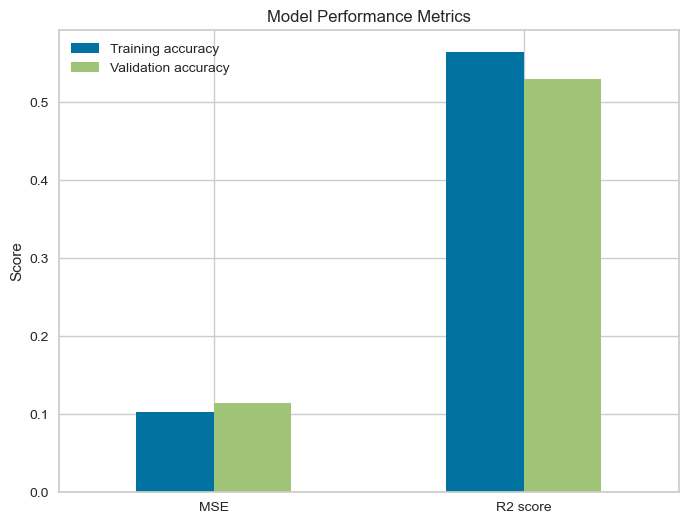

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data into X and y before proceeding with the visualization code
# For example:
# X = your_feature_data
# y = your_target_data

# Assuming X and y are already loaded with your data
# Here it checks for missing values
if np.any(np.isnan(X)):
    print("There are missing values in the dataset.")
    # If necessary, fill missing values using an appropriate method
    # For instance, you can fill missing values with the mean of each column:
    X[np.isnan(X)] = np.nanmean(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_test)

# Calculate Mean Squared Error for training and validation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

# Calculate R2 score for training and validation
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_val_pred)

# Create a DataFrame for results
results = pd.DataFrame(columns=['Training accuracy', 'Validation accuracy'],
                       index=['MSE', 'R2 score'])

# Add accuracy results to the DataFrame
results.loc['MSE', 'Training accuracy'] = mse_train
results.loc['MSE', 'Validation accuracy'] = mse_val
results.loc['R2 score', 'Training accuracy'] = r2_train
results.loc['R2 score', 'Validation accuracy'] = r2_val

# Print the results DataFrame
print("Results:")
print(results)

# Create a bar chart to visualize MSE and R2 scores
results.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Linear model produced good results for this dataset because upon calculating the MSE and R2 score for both the training and validation datasets, a lower MSE score of 0.103345 and 0.114769 for training accuracy and validation accuracy respectively were derived and a higher R2 score of 0.564127 and  0.530041 for training accuracy and validation accuracy respectively were also derived which are very good results and this indicates better model performance because the MSE is lower than the R2 score which suggests that the linear regression model fits the data well.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3,4 and 5
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the gown and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing part I need and also the remove the unnecessary part which wasn't needed.
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially with the dataframe when I tried to visualize it. I figured out the error and debugged and after which I was able visualize my results.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

The training MSE is 0.103345 which indicates that, on the average, the model's predictions on the training data are off by approximately 0.103345 squared units.

The validation MSE is slightly higher at 0.114769, which suggests that the model's predictions on the validation data are slightly less accurate than on the training data.

The training R2 score is 0.564127, which indicates that the model explains approximately 56.41% of the variance in the training data.

The validation R2 score is 0.530041, which suggests that the model explains approximately 53.00% of the variance in the validation data.

Summary of the key patterns and my findings:

The model appears to be performing reasonably well, as indicated by the relatively low MSE values for both training and validation. The fact that the validation MSE is only slightly higher than the training MSE suggests that the model is generalizing reasonably well to unseen data.

The R2 scores for both training and validation are positive, which indicates that the model provides a better fit to the data than a horizontal line. However, the R2 scores are not extremely high, and this suggests that there may be some variability in the target variable that the linear regression model did not capture.

The R2 score for training is slightly higher than the R2 score for validation, which indicates that the model fits the training data slightly better than the validation data, although the difference is not substantial which suggests that overfitting is not a significant concern here.

Conclusively, based on the provided results, the linear regression model seems to provide a reasonable fit to the data, with modest predictive accuracy.




## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I really liked the fact that I was able to visualize the results especially for the training and validation accuracies for different data sizes. Also seeing the result in a bar chart plot was so intriging and captivating. However, the interpretation of Mean Squared Error (MSE) and R2 score was a bit confusing and challenging to me at some point. Overall, I'm glad I was able extract meaningful insights from the data.

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

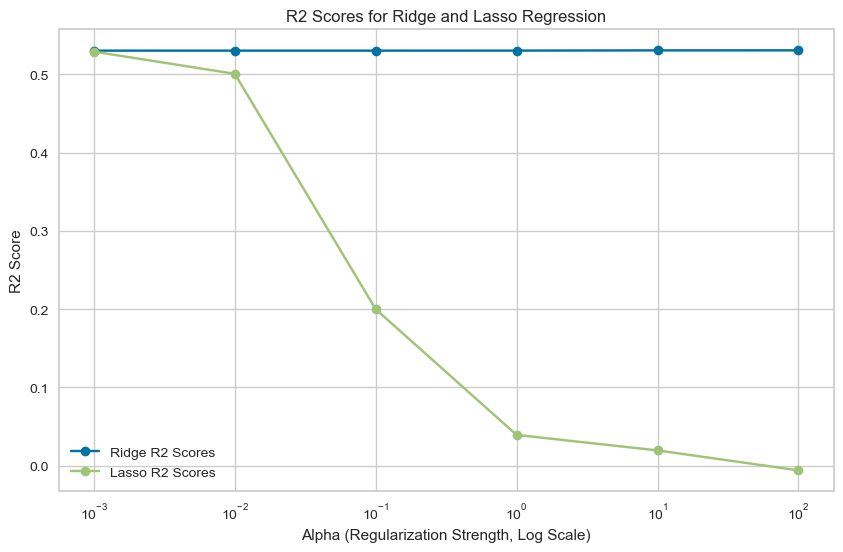

Best method: Ridge
Best alpha value: 100
Best R2 score: 0.5304147408849901


In [28]:
# TO DO: ADD YOUR CODE HERE

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming X and y are already loaded with your data

# Here it checks for missing values
if np.any(np.isnan(X)):
    print("There are missing values in the dataset.")
    # If necessary, fill missing values using an appropriate method
    # For instance, you can fill missing values with the mean of each column:
    X[np.isnan(X)] = np.nanmean(X)

# Here it splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here it initialize variables to track best results
best_method = None
best_alpha = None
best_r2_score = -np.inf
ridge_r2_scores = []
lasso_r2_scores = []
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Here it tests Ridge and Lasso with different alpha values
for alpha in alpha_values:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_val_pred_ridge = ridge_model.predict(X_test)
    r2_score_ridge = r2_score(y_test, y_val_pred_ridge)
    ridge_r2_scores.append(r2_score_ridge)

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_val_pred_lasso = lasso_model.predict(X_test)
    r2_score_lasso = r2_score(y_test, y_val_pred_lasso)
    lasso_r2_scores.append(r2_score_lasso)

    # Here it determines which method and alpha gave the best R2 score
    if r2_score_ridge > best_r2_score:
        best_method = "Ridge"
        best_alpha = alpha
        best_r2_score = r2_score_ridge

    if r2_score_lasso > best_r2_score:
        best_method = "Lasso"
        best_alpha = alpha
        best_r2_score = r2_score_lasso

# Here it visualizes the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, ridge_r2_scores, marker='o', label='Ridge R2 Scores')
plt.plot(alpha_values, lasso_r2_scores, marker='o', label='Lasso R2 Scores')
plt.title('R2 Scores for Ridge and Lasso Regression')
plt.xlabel('Alpha (Regularization Strength, Log Scale)')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

# Here it prints the best results
print(f"Best method: {best_method}")
print(f"Best alpha value: {best_alpha}")
print(f"Best R2 score: {best_r2_score}")


In [ ]:
*ANSWER HERE* In my opinion, R2 score of 0.5304 can be considered good enough.